In [113]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from skfeature.function.similarity_based import fisher_score
%matplotlib inline

#data = pd.read_csv('dataset/roi_95img_9_roi_glrlm_32p.csv')
train = pd.read_csv('dataset/train.csv')

X_train = train.copy()
y_train = X_train.pop('target')

std = StandardScaler()
std.fit(X_train)
X_train = pd.DataFrame(std.transform(X_train), columns=X_train.columns)

In [104]:
cols = train.columns
#print(cols)
fishertrain = train.drop(cols[0],axis = 1)

fishertrain

,GLRLM_LongRunEmphasis,GLRLM_LongRunHighGrayLevelEmphasis,GLRLM_LongRunLowGrayLevelEmphasis,GLRLM_LowGrayLevelRunEmphasis,GLRLM_RunLengthNonUniformity,GLRLM_RunPercentage,GLRLM_Short owGrayLevelEmphasis,GLRLM_ShortRunEmphasis,GLRLM_ShortRunHighGrayLevelEmphasis,contrast_d1_0,...,homogeneity_d1_90,homogeneity_d2_0,homogeneity_d2_135,homogeneity_d2_45,homogeneity_d2_90,homogeneity_d3_0,homogeneity_d3_135,homogeneity_d3_45,homogeneity_d3_90,target
0,1.311738,11202.312250,1,1.941050e+12,104490.4727,0.711170,1.941050e+12,0.962101,6248.162614,81.544355,...,0.078017,0.083561,0.068090,0.113151,0.054124,0.075709,0.051072,0.062977,0.044045,normal
1,1.311738,11202.312250,1,1.941050e+12,104490.4727,0.711170,1.941050e+12,0.962101,6248.162614,124.416331,...,0.086276,0.079814,0.073224,0.104705,0.060168,0.064384,0.048778,0.062706,0.051739,normal
2,1.311738,11202.312250,1,1.941050e+12,104490.4727,0.711170,1.941050e+12,0.962101,6248.162614,112.056452,...,0.100219,0.072539,0.055224,0.156107,0.051586,0.045180,0.044036,0.094736,0.044099,normal
3,1.311738,11202.312250,1,1.941050e+12,104490.4727,0.711170,1.941050e+12,0.962101,6248.162614,116.825605,...,0.122639,0.072789,0.160910,0.084760,0.067978,0.073679,0.109165,0.061735,0.072242,normal
4,1.311738,11202.312250,1,1.941050e+12,104490.4727,0.711170,1.941050e+12,0.962101,6248.162614,54.373992,...,0.080666,0.094850,0.081180,0.077215,0.073182,0.072491,0.061761,0.062308,0.053932,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,1.690882,6720.981343,1,3.418910e+13,135491.9377,0.984368,3.418910e+13,0.905293,2741.941053,6.655242,...,0.191295,0.229896,0.184580,0.177387,0.159907,0.173414,0.155255,0.155723,0.150463,fatty
534,1.690882,6720.981343,1,3.418910e+13,135491.9377,0.984368,3.418910e+13,0.905293,2741.941053,32.155242,...,0.137678,0.184315,0.104188,0.183653,0.075944,0.134796,0.075228,0.109611,0.076369,fatty
535,1.690882,6720.981343,1,3.418910e+13,135491.9377,0.984368,3.418910e+13,0.905293,2741.941053,11.597782,...,0.221401,0.218391,0.178974,0.323984,0.152210,0.175708,0.129341,0.206189,0.133383,fatty
536,1.690882,6720.981343,1,3.418910e+13,135491.9377,0.984368,3.418910e+13,0.905293,2741.941053,4.539315,...,0.232003,0.294028,0.204533,0.244181,0.173587,0.240899,0.144197,0.160470,0.147556,fatty


In [116]:
X = X_train.to_numpy()
Y = y_train.to_numpy()


ranks = fisher_score.fisher_score(X,Y)
#ranks mn a7sn score le a2al score bel index
print (ranks)

#remove first 30 features
dropped_columns = ranks[30:]
cols = train.columns
fishertrain = train.copy()
for i in range(len(dropped_columns)):
    fishertrain = fishertrain.drop(cols[dropped_columns[i]],axis = 1)

fishertrain.to_csv('dataset/fishertrain.csv')

test = pd.read_csv('dataset/test.csv')
cols = test.columns
fishertest = test.copy()
for i in range(len(dropped_columns)):
    fishertest = fishertest.drop(cols[dropped_columns[i]],axis = 1)

fishertest.to_csv('dataset/fishertest.csv')    

[53 51 54 52 33 28 32 29 36 56 35 31 58 25 49 26 27 34 30 11  7 48 50  8
  9  5  3 44 46 42 10  6 45  1 40  4 38 47 43 24  2 59 20  0 41 22 18 21
 57 23 19 16 14 17 15 39 12 13 37 55]


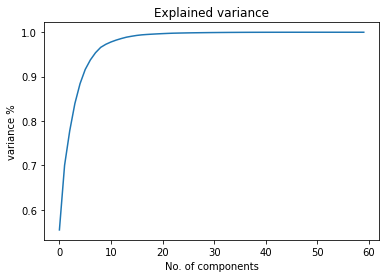

In [52]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("No. of components")
plt.ylabel("variance %")
plt.title("Explained variance")
plt.show()

In [49]:
pca = PCA(n_components=10)
pca.fit(X)
pcax = pca.transform(X)
pcax.shape

#plt.figure()
#plt.plot(np.cumsum(pca.explained_variance_ratio_))

#for x in pcax:
# print(x)


(538, 60)

In [132]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [167]:
correlation_train = train.copy()
correlation_test = test.copy()
corr_features = correlation(correlation_train, 0.7)
len(set(corr_features))

48

In [153]:
corr_features

{'GLRLM_LongRunHighGrayLevelEmphasis',
 'GLRLM_RunPercentage',
 'GLRLM_Short owGrayLevelEmphasis',
 'GLRLM_ShortRunEmphasis',
 'GLRLM_ShortRunHighGrayLevelEmphasis',
 'contrast_d1_90',
 'contrast_d2_0',
 'contrast_d2_135',
 'contrast_d2_45',
 'contrast_d2_90',
 'contrast_d3_0',
 'contrast_d3_135',
 'contrast_d3_45',
 'contrast_d3_90',
 'correlation_d1_90',
 'correlation_d2_0',
 'correlation_d2_135',
 'correlation_d2_45',
 'correlation_d2_90',
 'correlation_d3_0',
 'correlation_d3_135',
 'correlation_d3_45',
 'correlation_d3_90',
 'energy_d1_0',
 'energy_d1_135',
 'energy_d1_45',
 'energy_d1_90',
 'energy_d2_0',
 'energy_d2_135',
 'energy_d2_45',
 'energy_d2_90',
 'energy_d3_0',
 'energy_d3_135',
 'energy_d3_45',
 'energy_d3_90',
 'entropy',
 'homogeneity_d1_0',
 'homogeneity_d1_135',
 'homogeneity_d1_45',
 'homogeneity_d1_90',
 'homogeneity_d2_0',
 'homogeneity_d2_135',
 'homogeneity_d2_45',
 'homogeneity_d2_90',
 'homogeneity_d3_0',
 'homogeneity_d3_135',
 'homogeneity_d3_45',
 'homog

In [172]:
#correlation_train = correlation_train.drop(corr_features,axis=1)
#correlation_test = correlation_test.drop(corr_features,axis=1)
correlation_test.shape
correlation_test.to_csv('dataset/corrtest.csv')    
correlation_train.shape
correlation_train.to_csv('dataset/corrtrain.csv')    